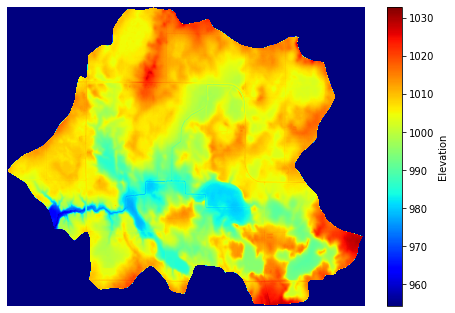

In [10]:
import numpy as np # type: ignore
from osgeo import gdal, gdal_array # type: ignore
import matplotlib.pyplot as plt # type: ignore

npz_file_path = 'C:/Users/SD-LORENZO-PC/pyproject/rndPy/Geospatial/dataset/beauford.npz'
data = np.load(npz_file_path)['beauford']

rows, cols = data.shape

driver = gdal.GetDriverByName('MEM')
dataset = driver.Create('', cols, rows, 1, gdal.GDT_Float32)

dataset.GetRasterBand(1).WriteArray(data)
dataset.GetRasterBand(1).SetNoDataValue(-9999)

plt.figure(figsize=(8, 5.5))
plt.imshow(data, cmap='jet', vmin=np.min(data[data != -9999]), vmax=np.max(data), aspect='auto')
plt.colorbar(label="Elevation")
plt.axis('off') 
plt.show()

dataset = None


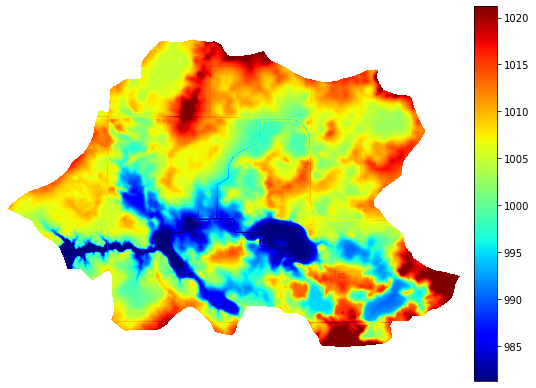

{'vmin': np.float64(981.260009765625), 'vmax': np.float64(1021.1950073242188)}

In [2]:
import richdem as rd
import numpy as np

npz_file_path = 'C:/Users/SD-LORENZO-PC/pyproject/rndPy/Geospatial/dataset/beauford.npz'
beau = rd.rdarray(np.load(npz_file_path)['beauford'], no_data=-9999)

rd.rdShow(beau, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

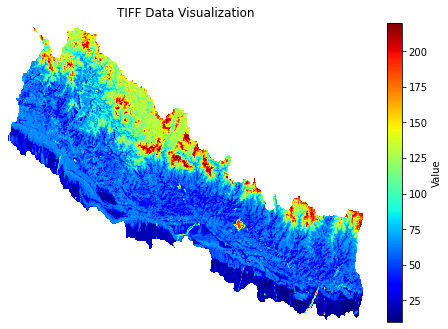

In [14]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

tif_file_path = 'C:/Users/SD-LORENZO-PC/pyproject/rndPy/Geospatial/nepal.tif'

dataset = gdal.Open(tif_file_path)
if dataset is None:
    raise FileNotFoundError(f"Could not open file: {tif_file_path}")

band = dataset.GetRasterBand(1)
data = band.ReadAsArray()

no_data_value = band.GetNoDataValue()
if no_data_value is not None:
    data = np.ma.masked_equal(data, no_data_value)

plt.figure(figsize=(8, 5.5))
plt.imshow(data, cmap='jet', aspect='auto')
plt.colorbar(label="Value")
plt.axis('off')
plt.title("TIFF Data Visualization")
plt.show()

dataset = None
